In [11]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K


# Fruit class contains the methods needed to derive the attributes and process the dataset
# 
class fruit:
  def __init__(self, fruitname, index):
    self.fruitname = fruitname
    self.index = index
    self.dataset = np.load(f'full_numpy_bitmap_{fruitname}.npy')[:100000]
    print(f'Length of {self.fruitname} : {len(self.dataset)}')
    self.target = self.annotate_dataset()


    

  def shape(self):
    return self.dataset.shape

  def annotate_dataset(self):
    target = np.arange(self.shape()[0])
    target.fill(self.index)
    return target

  def plot_sample(self):
    fig, ax = plt.subplots(figsize=(5,5))
    plt.title(f'Sample of the {self.fruitname} drawings')

    for i in range(1,26):
      sub = fig.add_subplot(5, 5, i)
      sub.imshow(self.dataset[0,i,:,:], interpolation='nearest')

    plt.show()



# Create a class of each fruit
classification_items = ['apple', 'banana', 'pear', 'pineapple', 'strawberry']
class_creation = [fruit(classification_items[i], i) for i in range(len(classification_items))]


# Derive the dataset from each fruit.
features = [fruit.dataset for fruit in class_creation]
targets = [fruit.target for fruit in class_creation]

#Combine all the data samples for all the fruit samples
#Image features are reshaped to 28,28 arrays.
#Target variables are converted from the index variables they are identified with
#one-hot encoded for the CNN model
features = np.concatenate(features)
features = features.reshape(features.shape[0], 28,28)
targets = np.concatenate(targets)
targets = np_utils.to_categorical(targets)

print(f'features : {features.shape}')
print(f'target : {targets.shape}')


#Shuffling the dataset and splitting into train, test and validation datasets
features_train, features_test, targets_train, targets_test = train_test_split(features,targets,test_size=0.2,random_state=45)


features_train, features_validation, targets_train, targets_validation = train_test_split(features,targets,test_size=0.3,random_state=40)












Length of apple : 100000
Length of banana : 100000
Length of pear : 100000
Length of pineapple : 100000
Length of strawberry : 100000
features : (500000, 28, 28)
target : (500000, 5)


In [23]:
#Model created.
#Dropout values considered include 0.1, 0.2, 0.25
#Dense Layer values considered are 516(good slight overfit), 256, 64 and 128

model = Sequential()
model.add(Conv2D(30, (3, 3), input_shape=(28, 28,1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(classification_items), activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(features_train, targets_train, validation_data=(features_validation,targets_validation), epochs=25, batch_size=150)
scores = model.evaluate(features_test, targets_test, verbose=0)
print('Final CNN accuracy: ', scores[1])


Epoch 1/25
2334/2334 [==============================] - 19s 7ms/step - loss: 0.3950 - accuracy: 0.8846 - val_loss: 0.2157 - val_accuracy: 0.9251
Epoch 2/25
2334/2334 [==============================] - 18s 8ms/step - loss: 0.2241 - accuracy: 0.9226 - val_loss: 0.1942 - val_accuracy: 0.9325
Epoch 3/25
2334/2334 [==============================] - 16s 7ms/step - loss: 0.2027 - accuracy: 0.9301 - val_loss: 0.1861 - val_accuracy: 0.9353
Epoch 4/25
2334/2334 [==============================] - 15s 6ms/step - loss: 0.1893 - accuracy: 0.9341 - val_loss: 0.1746 - val_accuracy: 0.9393
Epoch 5/25
2334/2334 [==============================] - 15s 6ms/step - loss: 0.1799 - accuracy: 0.9372 - val_loss: 0.1747 - val_accuracy: 0.9393
Epoch 6/25
2334/2334 [==============================] - 15s 6ms/step - loss: 0.1745 - accuracy: 0.9395 - val_loss: 0.1694 - val_accuracy: 0.9411
Epoch 7/25
2334/2334 [==============================] - 15s 6ms/step - loss: 0.1693 - accuracy: 0.9415 - val_loss: 0.1729 - val_ac

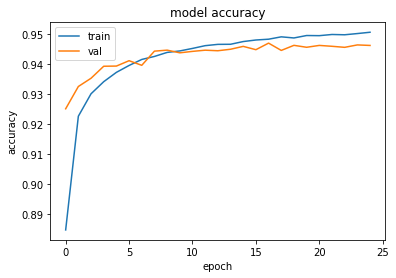

In [24]:
#View the model performance to ensure abscence of overfit and underfit
history.history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [29]:
scores

[0.13051055371761322, 0.9548500180244446]

In [25]:
#Save the model
import pickle
with open('5_Fruit_Classification_model.pkl', 'wb') as file:
      pickle.dump(model, file)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dropout
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config